In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_excel('TaskData1.xlsx')
target=["Doctor", "Lawyer", "Teacher", "Engineer", "Accountant",
       "Nurse", "Police", "Architect", "Dentist", "Pharmacist"]

In [3]:
def edit_distance(data,target):
    col=len(data)
    rows=len(target)
    ar = [[0 for _ in range(col+1)] for _ in range(rows+1)]
    for j in range(col+1):
        ar[0][j]=j
    for i in range(rows+1):
        ar[i][0]=i
    for i in range(1,rows+1):
        for j in range(1,col+1):
            if data[j-1]==target[i-1]:
                ar[i][j]=ar[i-1][j-1]
            if data[j-1]!=target[i-1]:
                ar[i][j]=min(ar[i-1][j],ar[i-1][j-1],ar[i][j-1])+1
    return ar[i][j]

In [4]:
def match(data,target):
    corrected=[]
    match=None
    for response in data:
        dist=float('inf')
        for each in target:
            x=edit_distance(response.lower(),each.lower())
            if (x<dist):
                dist=x
                match=each
        corrected.append(match)
    return corrected

In [5]:
data['Corrected'] = match(data['Responses'], target)
print (data)
count = data['Corrected'].value_counts()
print(count)
data.to_excel('corrected_careers_survey.xlsx', index=False)


       Responses   Corrected
0         cokter      Doctor
1      dentiists     Dentist
2        Enginir    Engineer
3         PoLICE      Police
4      engneiear    Engineer
...          ...         ...
1401     enginir    Engineer
1402  aCcountANT  Accountant
1403  accountant  Accountant
1404      POlIcE      Police
1405    enjineer    Engineer

[1406 rows x 2 columns]
Corrected
Engineer      328
Doctor        225
Teacher       195
Dentist       192
Police        162
Nurse          85
Lawyer         82
Architect      63
Pharmacist     42
Accountant     32
Name: count, dtype: int64


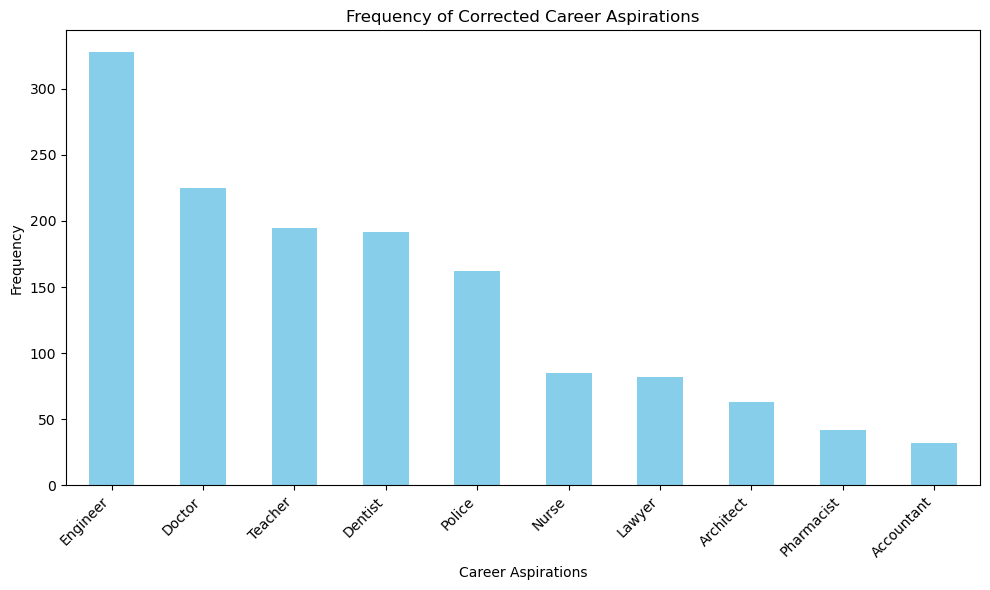

In [9]:
plt.figure(figsize=(10, 6))
count.plot(kind='bar', color='skyblue')
plt.xlabel('Career Aspirations')
plt.ylabel('Frequency')
plt.title('Frequency of Corrected Career Aspirations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()